In [43]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import r2_score,accuracy_score,mean_squared_error

In [29]:
prediction_data=pd.read_csv("/content/test.csv")

In [30]:
df=pd.read_csv("/content/train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [31]:
df.drop("Name",axis=1,inplace=True)
prediction_data.drop("Name",axis=1,inplace=True)
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,male,26.0,0,0,111369,30.0000,C148,C


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [33]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [34]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [35]:
df.duplicated().sum()

0

In [36]:
df.drop([  "Cabin", "Ticket"],axis=1,inplace=True)
prediction_data.drop([ "Cabin","Ticket"],axis=1,inplace=True)

In [37]:
y=pd.get_dummies(df["Pclass"]) #One hot encoding the  passenger class
y.columns = ['1st class','2nd class', '3rd class']
df.drop("Pclass",axis=1,inplace=True)
df=df.join(y)
print(df.columns)
y=pd.get_dummies(df["Embarked"]) #One hot encoding the  passenger class
df.drop("Embarked",axis=1,inplace=True)
y.columns = ['Cherbourg','Queenstown', 'Southampton']
df=df.join(y)
y=pd.get_dummies(df["Sex"]) #One hot encoding the  passenger class
df.drop("Sex",axis=1,inplace=True)

df=df.join(y)
print(df)

y=pd.get_dummies(prediction_data["Pclass"]) #One hot encoding the  passenger class
y.columns = ['1st class','2nd class', '3rd class']
prediction_data.drop("Pclass",axis=1,inplace=True)
prediction_data=prediction_data.join(y)
print(prediction_data.columns)
y=pd.get_dummies(prediction_data["Embarked"]) #One hot encoding the  passenger class
prediction_data.drop("Embarked",axis=1,inplace=True)
y.columns = ['Cherbourg','Queenstown', 'Southampton']
prediction_data=prediction_data.join(y)
y=pd.get_dummies(prediction_data["Sex"]) #One hot encoding the  passenger class
prediction_data.drop("Sex",axis=1,inplace=True)
prediction_data=prediction_data.join(y)

Index(['PassengerId', 'Survived', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', '1st class', '2nd class', '3rd class'],
      dtype='object')
     PassengerId  Survived   Age  SibSp  ...  Queenstown  Southampton  female  male
0              1         0  22.0      1  ...           0            1       0     1
1              2         1  38.0      1  ...           0            0       1     0
2              3         1  26.0      0  ...           0            1       1     0
3              4         1  35.0      1  ...           0            1       1     0
4              5         0  35.0      0  ...           0            1       0     1
..           ...       ...   ...    ...  ...         ...          ...     ...   ...
886          887         0  27.0      0  ...           0            1       0     1
887          888         1  19.0      0  ...           0            1       1     0
888          889         0   NaN      1  ...           0            1       1     0
889  

In [38]:
df['Age'].fillna((df['Age'].mean()), inplace=True)
prediction_data['Age'].fillna((prediction_data['Age'].mean()), inplace=True)
print(prediction_data.isna().sum())

PassengerId    0
Age            0
SibSp          0
Parch          0
Fare           1
1st class      0
2nd class      0
3rd class      0
Cherbourg      0
Queenstown     0
Southampton    0
female         0
male           0
dtype: int64


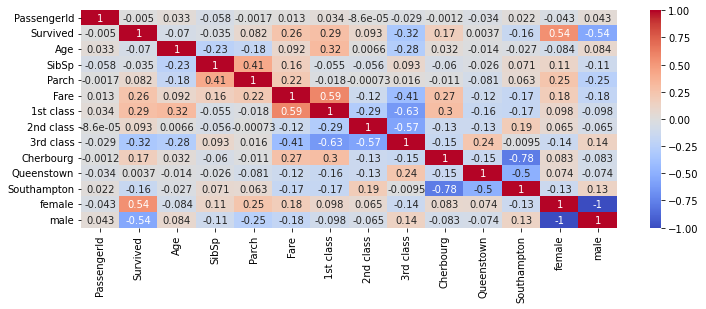

In [39]:
plt.figure(figsize=(12,4))
sns.heatmap(data=df.corr(), cmap='coolwarm', annot=True)

In [44]:
X=df.drop("Survived",axis=1)
y=df[["Survived"]]
print(df,prediction_data)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)
scaler=StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
copy_prediction_data=prediction_data
prediction_data=scaler.transform(prediction_data)

     PassengerId  Survived        Age  ...  Southampton  female  male
0              1         0  22.000000  ...            1       0     1
1              2         1  38.000000  ...            0       1     0
2              3         1  26.000000  ...            1       1     0
3              4         1  35.000000  ...            1       1     0
4              5         0  35.000000  ...            1       0     1
..           ...       ...        ...  ...          ...     ...   ...
886          887         0  27.000000  ...            1       0     1
887          888         1  19.000000  ...            1       1     0
888          889         0  29.699118  ...            1       1     0
889          890         1  26.000000  ...            0       0     1
890          891         0  32.000000  ...            0       0     1

[891 rows x 14 columns]      PassengerId       Age  SibSp  Parch  ...  Queenstown  Southampton  female  male
0            892  34.50000      0      0  ...     

In [47]:
print(X_train)
print(prediction_data)

prediction_data[np.isnan(prediction_data)] = 0

[[ 1.64504316  0.04374109 -0.48484594 ...  0.60502328 -0.72464761
   0.72464761]
 [-0.60400821 -0.55027828 -0.48484594 ... -1.65282896  1.3799811
  -1.3799811 ]
 [-1.67609487  0.76134336  0.43788081 ...  0.60502328 -0.72464761
   0.72464761]
 ...
 [ 0.96139369  0.04374109 -0.48484594 ...  0.60502328 -0.72464761
   0.72464761]
 [ 0.22336302  0.04374109 -0.48484594 ... -1.65282896  1.3799811
  -1.3799811 ]
 [ 1.22941536  0.91565179 -0.48484594 ...  0.60502328 -0.72464761
   0.72464761]]
[[ 1.73438371  0.4141494  -0.48484594 ... -1.65282896 -0.72464761
   0.72464761]
 [ 1.73826808  1.37857708  0.43788081 ...  0.60502328  1.3799811
  -1.3799811 ]
 [ 1.74215245  2.53589029 -0.48484594 ... -1.65282896 -0.72464761
   0.72464761]
 ...
 [ 3.34639808  0.72276626 -0.48484594 ...  0.60502328 -0.72464761
   0.72464761]
 [ 3.35028245  0.08798693 -0.48484594 ...  0.60502328 -0.72464761
   0.72464761]
 [ 3.35416682  0.08798693  0.43788081 ... -1.65282896 -0.72464761
   0.72464761]]


In [48]:
randomforest_classifier=RandomForestClassifier()
randomforest_classifier.fit(X_train,y_train)
pred=randomforest_classifier.predict(X_test)
print(accuracy_score(y_test, pred))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.820627802690583


In [49]:
logistic_regressor = LogisticRegression() #initialising logistic regression
logistic_regressor.fit(X_train,y_train) #fitting the data
y_pred = logistic_regressor.predict(X_test) #predict the result

#the accuracy score
accuracy = accuracy_score(y_test, y_pred)
accuracy_perc = round(100*accuracy, 2)
print(f'The accuracy of the model is {accuracy_perc} %')

The accuracy of the model is 79.37 %


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [50]:
kneighbors_classifier = KNeighborsClassifier() #initialising the kneighbors algorithm
kneighbors_classifier.fit(X_train, y_train) #fitting the data
print("Training accuracy:",kneighbors_classifier.score(X_train, y_train)) 
print("Testing accuracy:",kneighbors_classifier.score(X_test, y_test))
y_pred_test = kneighbors_classifier.predict(X_test)
y_pred_train = kneighbors_classifier.predict(X_train)

Training accuracy: 0.8682634730538922
Testing accuracy: 0.7937219730941704


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
